In [1]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import pandas as pd

# Chemin vers les fichiers CSV
chemins = [
    "C:/Users/maxim/Downloads/interventions2008.csv",
    "C:/Users/maxim/Downloads/interventions2009.csv",
    "C:/Users/maxim/Downloads/interventions2010.csv",
    "C:/Users/maxim/Downloads/interventions2011.csv",
    "C:/Users/maxim/Downloads/interventions (1).csv",
    "C:/Users/maxim/Downloads/interventions.csv",
    "C:/Users/maxim/Downloads/interventions2014.csv",
    "C:/Users/maxim/Downloads/interventions2015.csv",
    "C:/Users/maxim/Downloads/interventions2016.csv",
    "C:/Users/maxim/Downloads/interventions2017.csv",
    "C:/Users/maxim/Downloads/interventions2018.csv",
    "C:/Users/maxim/Downloads/interventions2019.csv",
    "C:/Users/maxim/Downloads/interventions2020.csv",
    "C:/Users/maxim/Downloads/interventions2021.csv",
]


donnees = {}
for i, chemin in enumerate(chemins, start=2008):
    donnees[i] = pd.read_csv(chemin, sep=";", index_col=0, encoding='latin-1')


In [3]:
colonnesDatasets = {}


datasets = donnees  

for annee, dataframe in datasets.items():
    colonnesDatasets[annee] = dataframe.columns.tolist()




In [4]:
print(datasets)

{2008:                 Zone         Région Numéro       Département  Catégorie  \
Année                                                                     
2008         Sud-est           PACA   BMPM  Bouches-du-Rhône        NaN   
2008   Île-de-France  Île-de-France   BSPP             Paris        NaN   
2008         Sud-est    Rhône-Alpes      1               Ain        2.0   
2008            Nord       Picardie      2             Aisne        2.0   
2008         Sud-est       Auvergne      3            Allier        3.0   
...              ...            ...    ...               ...        ...   
2008   Île-de-France  Île-de-France     95        Val-d'Oise        1.0   
2008        Antilles     Guadeloupe    971        Guadeloupe        3.0   
2008        Antilles     Martinique    972        Martinique        4.0   
2008          Guyane         Guyane    973            Guyane        5.0   
2008     Océanindien        Réunion    974           Réunion        2.0   

       Feuxd'habi

In [5]:
a = [i for i in range(2017, 2022)]
for annee, dataframe in datasets.items():
    datasets[annee] = dataframe.rename(columns={'Catégorie A': 'Catégorie'})


In [6]:
colonnesSupplémentaires = {}
for annee, dataframe in colonnesDatasets.items():
    for j in range(2008,2022):
        if annee != j:
            colonnesSupplémentaires[annee] = [colonne for colonne in dataframe if colonne not in colonnesDatasets[j]]
print(colonnesSupplémentaires)             

{2008: ['Catégorie', 'Accidentsenmontagne', 'Noyadesenpiscinesoueauxintérieures', 'Noyadesenmer', 'Secoursàvictimes', 'Aidesàpersonnes', 'Secoursàpersonnes', 'fuitesdegaz', 'contaminations', 'dontTéléalarmes', 'Eboulements', 'surveillances', 'Autresopérationdiverse'], 2009: ['Catégorie', 'Accidentsenmontagne', 'Noyadesenpiscinesoueauxintérieures', 'Noyadesenmer', 'Aidesàpersonnes', 'dontTéléalarmes', 'Eboulements'], 2010: ['Catégorie', 'Aidesàpersonnes'], 2011: ['Catégorie'], 2012: ['Catégorie', 'Aidesàpersonnes'], 2013: ['Catégorie'], 2014: ['Catégorie', 'dontTéléalarmes'], 2015: ['Catégorie', 'dontTéléalarmes'], 2016: ['Catégorie'], 2017: [], 2018: [], 2019: [], 2020: [], 2021: []}


In [7]:
uniformedDatasets = {}
for annee, dataframe in datasets.items():
    colonnes_a_exclure = colonnesSupplémentaires[annee]
    colonnes_a_inclure = [colonne for colonne in dataframe.columns if colonne not in colonnes_a_exclure]
    uniformedDatasets[annee] = dataframe[colonnes_a_inclure].copy()


In [8]:
print(uniformedDatasets)

{2008:                 Zone         Région Numéro       Département  \
Année                                                          
2008         Sud-est           PACA   BMPM  Bouches-du-Rhône   
2008   Île-de-France  Île-de-France   BSPP             Paris   
2008         Sud-est    Rhône-Alpes      1               Ain   
2008            Nord       Picardie      2             Aisne   
2008         Sud-est       Auvergne      3            Allier   
...              ...            ...    ...               ...   
2008   Île-de-France  Île-de-France     95        Val-d'Oise   
2008        Antilles     Guadeloupe    971        Guadeloupe   
2008        Antilles     Martinique    972        Martinique   
2008          Guyane         Guyane    973            Guyane   
2008     Océanindien        Réunion    974           Réunion   

       Feuxd'habitations-bureaux  dontfeuxdecheminées  \
Année                                                   
2008                       954.0              

In [9]:
regionDatasets = {}

for annee, dataframe in uniformedDatasets.items():
    for region in dataframe['Région'].unique():
        df_region = dataframe[dataframe['Région'] == region].reset_index(drop=True)
        

        if region not in regionDatasets:
            regionDatasets[region] = []
        regionDatasets[region].append(df_region)

regionDatasetsFusionne = {}

for region, dataframes_list in regionDatasets.items():
    if region not in regionDatasetsFusionne:
        regionDatasetsFusionne[region] = pd.concat(dataframes_list, ignore_index=True)
    else:
        regionDatasetsFusionne[region] = regionDatasetsFusionne[region].append(dataframes_list, ignore_index=True)
        regionDatasetsFusionne[region] = regionDatasetsFusionne[region].drop("Région",axis=1)


regionDatasetsFusionne


{'PACA':        Zone Région Numéro              Département  Feuxd'habitations-bureaux  \
 0   Sud-est   PACA   BMPM         Bouches-du-Rhône                      954.0   
 1       Sud   PACA      4  Alpes-de-Haute-Provence                      207.0   
 2       Sud   PACA      5             Hautes-Alpes                      272.0   
 3       Sud   PACA      6          Alpes-Maritimes                      975.0   
 4       Sud   PACA     13         Bouches-du-Rhône                     1409.0   
 5       Sud   PACA     83                      Var                      721.0   
 6       Sud   PACA     84                 Vaucluse                      597.0   
 7   Sud-est   PACA   BMPM         Bouches-du-Rhône                      889.0   
 8       Sud   PACA      4  Alpes-de-Haute-Provence                      208.0   
 9       Sud   PACA      5             Hautes-Alpes                      243.0   
 10      Sud   PACA      6          Alpes-Maritimes                     1031.0   
 11     

In [10]:
regionDatasetsFusionne["Alsace"]

,Zone,Région,Numéro,Département,Feuxd'habitations-bureaux,dontfeuxdecheminées,Feuxd'ERPaveclocalàsommeil,Feuxd'ERPsanslocalàsommeil,Feuxdelocauxindustriels,Feuxdelocauxartisanaux,...,Odeurs-fuitesdegaz,Pollutions-contaminations,Piquetsdesécurité-surveillances,Autresopérationsdiverses,Aidesàpersonne,Secoursenmontagne,Secoursenpiscinesoueauxintérieures,Secoursenmer(FDSM),AutresSAV,Éboulements
0,Est,Alsace,67,Bas-Rhin,1766.0,646.0,17.0,170.0,121.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Est,Alsace,68,Haut-Rhin,985.0,512.0,9.0,15.0,25.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Est,Alsace,67,Bas-Rhin,1629.0,544.0,24.0,157.0,94.0,0.0,...,325.0,52.0,0.0,720.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Est,Alsace,68,Haut-Rhin,862.0,457.0,11.0,14.0,66.0,7.0,...,421.0,52.0,485.0,1316.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Est,Alsace,67,Bas-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Est,Alsace,68,Haut-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Est,Alsace,67,Bas-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,NaN
7,Est,Alsace,68,Haut-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN
8,Est,Alsace,67,Bas-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Est,Alsace,68,Haut-Rhin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for i, dataframe in uniformedDatasets.items():
    try:
        versionFinale = pd.merge(versionFinale,uniformedDatasets[i])
    except:
        versionFinale = uniformedDatasets[i]    

In [12]:
print(versionFinale)

Empty DataFrame
Columns: [Zone, Région, Numéro, Département, CatégorieA, Feuxd'habitations-bureaux, dontfeuxdecheminées, Feuxd'ERPaveclocalàsommeil, Feuxd'ERPsanslocalàsommeil, Feuxdelocauxindustriels, Feuxdelocauxartisanaux, Feuxdelocauxagricoles, Feuxsurvoiepublique, Feuxdevéhicules, Feuxdevégétations, Autresfeux, Incendies, Accidentssurlieuxdetravail, Accidentsàdomicile, Accidentsdesport, Accidentssurvoiepublique, Secoursenmontagne, Malaisessurlieuxdetravail, Malaisesàdomicile:urgencevitale, Malaisesàdomicile:carence, Malaisesensport, Malaisessurvoiepublique, Autolyses, Secoursenpiscinesoueauxintérieures, Secoursenmer(FDSM), Intoxications, dontintoxicationsauCO, AutresSAV, Secoursàvictime, Relevagedepersonnes, Recherchedepersonnes, Aidesàpersonne, Secoursàpersonne, Accidentsroutiers, Accidentsferroviaires, Accidentsaériens, Accidentsdenavigation, Accidentsdetéléportage, Accidentsdecirculation, Odeurs-fuitesdegaz, Odeurs(autresquegaz), Faitdusàl'électricité, Pollutions-contaminations

Variance expliquée par chaque composante principale:
[4.42223134e-01 1.11614717e-01 5.35786155e-02 4.94075719e-02
 4.23419390e-02 3.15616629e-02 2.70203513e-02 2.57376167e-02
 2.22935656e-02 2.05552642e-02 1.87974112e-02 1.69552670e-02
 1.64220382e-02 1.49135620e-02 1.14654477e-02 1.13691764e-02
 9.80901396e-03 8.85257679e-03 8.23747758e-03 7.58107278e-03
 5.93357973e-03 5.72573561e-03 4.94639484e-03 4.16365371e-03
 3.88535809e-03 3.22370941e-03 3.05311054e-03 2.73920224e-03
 2.36486226e-03 2.19577512e-03 1.84973670e-03 1.47985882e-03
 1.27908747e-03 1.07764364e-03 9.05275107e-04 8.74175513e-04
 7.37800107e-04 5.31080954e-04 4.49020420e-04 4.34272398e-04
 3.89628920e-04 3.67626311e-04 2.50986767e-04 1.67394723e-04
 1.01329592e-04 9.04407961e-05 4.57608555e-05 1.84865424e-08
 3.36598877e-32 3.49688599e-33 3.49688599e-33 3.49688599e-33]

Variance expliquée cumulée:
[0.44222313 0.55383785 0.60741647 0.65682404 0.69916598 0.73072764
 0.75774799 0.78348561 0.80577917 0.82633444 0.84513185 0

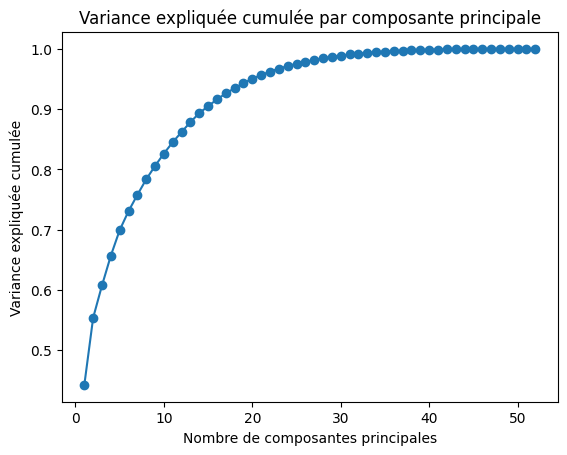

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df_all_data = uniformedDatasets[2008]


data_for_pca = df_all_data.select_dtypes(include=['float64', 'int64'])


imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_for_pca), columns=data_for_pca.columns)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)


pca = PCA()
pca_result = pca.fit_transform(data_scaled)


df_pca_result = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Variance expliquée par chaque composante principale:")
print(explained_variance_ratio)

print("\nVariance expliquée cumulée:")
print(cumulative_explained_variance)

# Visualiser la variance expliquée cumulée
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Variance expliquée cumulée par composante principale')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.show()


In [14]:
merged = pd.concat(uniformedDatasets.values(), ignore_index=True)
print(merged)

               Zone         Région Numéro       Département  \
0           Sud-est           PACA   BMPM  Bouches-du-Rhône   
1     Île-de-France  Île-de-France   BSPP             Paris   
2           Sud-est    Rhône-Alpes      1               Ain   
3              Nord       Picardie      2             Aisne   
4           Sud-est       Auvergne      3            Allier   
...             ...            ...    ...               ...   
1375       Antilles     Guadeloupe    971        Guadeloupe   
1376       Antilles     Martinique    972        Martinique   
1377         Guyane         Guyane    973            Guyane   
1378    Océanindien      LaRéunion    974           Réunion   
1379    Océanindien        Mayotte    976           Mayotte   

     Feuxd'habitations-bureaux dontfeuxdecheminées Feuxd'ERPaveclocalàsommeil  \
0                        954.0                42.0                       33.0   
1                       5628.0               119.0                      181.0   


In [27]:
cleaned = merged.dropna()

In [28]:
print(cleaned)

               Zone                     Région Numéro           Département  \
993             Est                   GrandEst      8              Ardennes   
997             Sud                  Occitanie     12               Aveyron   
999           Ouest                  Normandie     14              Calvados   
1006          Ouest                   Bretagne     22         Côtes-d'Armor   
1014            Sud                      Corse     2a          Corse-du-Sud   
1015            Sud                      Corse     2b           Haute-Corse   
1023          Ouest          Centre-ValdeLoire     37        Indre-et-Loire   
1049        Sud-est       Auvergne-Rhône-Alpes     63           Puy-de-Dôme   
1050      Sud-ouest         Nouvelle-Aquitaine     64  Pyrénées-Atlantiques   
1053            Est                   GrandEst     67              Bas-Rhin   
1065           Nord            Hauts-de-France     80                 Somme   
1066            Sud                  Occitanie     8

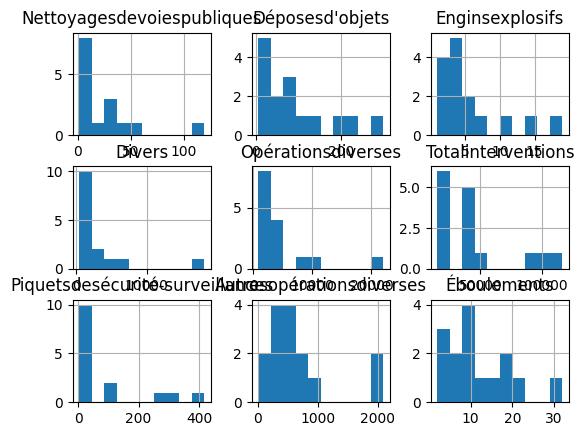

In [29]:
cleaned.hist()
plt.show()